In [1]:
import pandas as pd
import os

In [2]:
import pandas as pd
import sqlalchemy 
from urllib import parse

user = 'encore'
password = '1234'
host='127.0.0.1'
port = 3306
database = 'encore'
password = parse.quote_plus(password)
engine = sqlalchemy.create_engine(f"mysql://{user}:{password}@{host}:{port}/{database}")

try:
    with engine.connect() as connection:
        print("Database connection successful!")
except Exception as e:
    print(f"Database connection failed: {e}")

Database connection successful!


In [3]:
import zipfile

In [4]:
with zipfile.ZipFile("./data/tpss_bcycl_od_statnhm_202401.zip", "r") as f:
    f.extractall("./data/bicycle")

In [5]:
with zipfile.ZipFile("./data/tpss_bcycl_od_statnhm_202408.zip", "r") as f:
    f.extractall("./data/bicycle")

In [7]:
roots = "./data/bicycle/"
total = []
for file in os.listdir(roots):
    if file.endswith("csv"):
        total.append(pd.read_csv(roots+file, encoding='cp949'))

In [8]:
total.__len__()

61

In [55]:
total[:10]

[           기준_날짜 집계_기준  기준_시간대 시작_대여소_ID     시작_대여소명 종료_대여소_ID       종료_대여소명  \
 0       20240103  출발시간       0   ST-1006   목5동_054_1    ST-997     목4동_021_1   
 1       20240103  출발시간       0   ST-1029   녹번동_041_1    ST-459     녹번동_033_1   
 2       20240103  출발시간       0   ST-1035  불광2동_021_1   ST-2783    갈현1동_039_2   
 3       20240103  출발시간       0   ST-1045  성내2동_007_1   ST-1684    풍납1동_012_1   
 4       20240103  출발시간       0   ST-1055   강일동_001_1    ST-504     강일동_002_6   
 ...          ...   ...     ...       ...         ...       ...           ...   
 144005  20240103  도착시간    2355    ST-883   조원동_034_1   ST-2823    신길6동_007_1   
 144006  20240103  도착시간    2355    ST-920  개봉1동_051_3   ST-1000    신정7동_003_1   
 144007  20240103  도착시간    2355     ST-98  자양3동_025_2    ST-257    자양1동_042_1   
 144008  20240103  도착시간    2355     ST-98  자양3동_025_2   ST-3003  성수2가3동_023_1   
 144009  20240103  도착시간    2355    ST-983  중곡1동_022_1   ST-2843    중곡3동_002_1   
 
         전체_건수  전체_이용_분  전

In [57]:
bicycle_df = pd.concat(total, ignore_index = True)

In [58]:
bicycle_df.isnull().sum()

기준_날짜                 0
집계_기준                 0
기준_시간대                0
시작_대여소_ID             0
시작_대여소명            2531
종료_대여소_ID             0
종료_대여소명           43276
전체_건수                 0
전체_이용_분          197812
전체_이용_거리         197812
Unnamed: 10    11065164
dtype: int64

In [12]:
bicycle_df.drop('Unnamed: 10', axis=1, inplace=True)

In [13]:
bicycle_df.head()

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리
0,20240103,출발시간,0,ST-1006,목5동_054_1,ST-997,목4동_021_1,1,2.0,0.0
1,20240103,출발시간,0,ST-1029,녹번동_041_1,ST-459,녹번동_033_1,1,3.0,1460.0
2,20240103,출발시간,0,ST-1035,불광2동_021_1,ST-2783,갈현1동_039_2,1,4.0,253.0
3,20240103,출발시간,0,ST-1045,성내2동_007_1,ST-1684,풍납1동_012_1,1,4.0,730.0
4,20240103,출발시간,0,ST-1055,강일동_001_1,ST-504,강일동_002_6,1,121.0,13681.0


In [14]:
bicycle_df.head(3)

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리
0,20240103,출발시간,0,ST-1006,목5동_054_1,ST-997,목4동_021_1,1,2.0,0.0
1,20240103,출발시간,0,ST-1029,녹번동_041_1,ST-459,녹번동_033_1,1,3.0,1460.0
2,20240103,출발시간,0,ST-1035,불광2동_021_1,ST-2783,갈현1동_039_2,1,4.0,253.0


In [15]:
bicycle_df.기준_시간대.unique()

array([   0,    5,   10,   15,   20,   25,   30,   35,   40,   45,   50,
         55,  100,  105,  110,  115,  120,  125,  130,  135,  140,  145,
        150,  155,  200,  205,  210,  215,  220,  225,  230,  235,  240,
        245,  250,  255,  300,  305,  310,  315,  320,  325,  330,  335,
        340,  345,  350,  355,  400,  405,  410,  415,  420,  425,  430,
        435,  440,  445,  450,  455,  500,  505,  510,  515,  520,  525,
        530,  535,  540,  545,  550,  555,  600,  605,  610,  615,  620,
        625,  630,  635,  640,  645,  650,  655,  700,  705,  710,  715,
        720,  725,  730,  735,  740,  745,  750,  755,  800,  805,  810,
        815,  820,  825,  830,  835,  840,  845,  850,  855,  900,  905,
        910,  915,  920,  925,  930,  935,  940,  945,  950,  955, 1000,
       1005, 1010, 1015, 1020, 1025, 1030, 1035, 1040, 1045, 1050, 1055,
       1100, 1105, 1110, 1115, 1120, 1125, 1130, 1135, 1140, 1145, 1150,
       1155, 1200, 1205, 1210, 1215, 1220, 1225, 12

In [16]:
from datetime import date, datetime

In [17]:
datetime.strptime("20240103" + "{:04d}".format(10), "%Y%m%d%H%M")

datetime.datetime(2024, 1, 3, 0, 10)

In [18]:
bicycle_df.전체_건수.unique()

array([ 1,  2,  3,  4,  5,  6, 12,  7,  8,  9, 11, 10, 13, 17, 14, 15, 21,
       19])

In [22]:
bicycle_df[['기준_날짜', '기준_시간대']] = bicycle_df[['기준_날짜', '기준_시간대']].astype(str)

In [56]:
bicycle_df.기준_시간대

0           0000
1           0000
2           0000
3           0000
4           0000
            ... 
11065159    2355
11065160    2355
11065161    2355
11065162    2355
11065163    2355
Name: 기준_시간대, Length: 11065164, dtype: object

In [23]:
bicycle_df.기준_시간대 = bicycle_df.기준_시간대.str.zfill(4)

In [24]:
bicycle_df['시간대'] = bicycle_df.loc[:, ['기준_날짜', '기준_시간대']].apply(lambda x :
                datetime.strptime(x[0] + x[1], "%Y%m%d%H%M")   , axis=1)

/tmp/ipykernel_13938/770912156.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  datetime.strptime(x[0] + x[1], "%Y%m%d%H%M")   , axis=1)


In [25]:
bicycle_df

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리,시간대
0,20240103,출발시간,0000,ST-1006,목5동_054_1,ST-997,목4동_021_1,1,2.0,0.0,2024-01-03 00:00:00
1,20240103,출발시간,0000,ST-1029,녹번동_041_1,ST-459,녹번동_033_1,1,3.0,1460.0,2024-01-03 00:00:00
2,20240103,출발시간,0000,ST-1035,불광2동_021_1,ST-2783,갈현1동_039_2,1,4.0,253.0,2024-01-03 00:00:00
3,20240103,출발시간,0000,ST-1045,성내2동_007_1,ST-1684,풍납1동_012_1,1,4.0,730.0,2024-01-03 00:00:00
4,20240103,출발시간,0000,ST-1055,강일동_001_1,ST-504,강일동_002_6,1,121.0,13681.0,2024-01-03 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
11065159,20240826,도착시간,2355,ST-983,중곡1동_015_1,ST-252,중곡1동_005_1,2,83.0,14990.0,2024-08-26 23:55:00
11065160,20240826,도착시간,2355,ST-983,중곡1동_015_1,ST-253,군자동_012_1,1,28.0,4050.0,2024-08-26 23:55:00
11065161,20240826,도착시간,2355,ST-99,자양3동_036_1,ST-1300,장안1동_070_1,1,19.0,390.0,2024-08-26 23:55:00
11065162,20240826,도착시간,2355,ST-99,자양3동_036_1,ST-382,군자동_014_5,2,25.0,4424.0,2024-08-26 23:55:00


In [26]:
bicycle_df.시간대.apply(lambda x : x.weekday())

0           2
1           2
2           2
3           2
4           2
           ..
11065159    0
11065160    0
11065161    0
11065162    0
11065163    0
Name: 시간대, Length: 11065164, dtype: int64

In [27]:
겨울 = bicycle_df[bicycle_df.시간대.apply(lambda x : x.month == 1)].copy()
여름 = bicycle_df[bicycle_df.시간대.apply(lambda x : x.month == 8)].copy()

요일 = dict(zip(range(0,7), "월화수목금토일"))

In [28]:
요일 

{0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}

In [30]:
여름['요일'] = 여름.시간대.apply(lambda x : 요일[x.weekday()])

In [33]:
여름.groupby('요일')[['전체_건수']].sum().sort_values(by=['전체_건수'])

,전체_건수
요일,
일,735821
수,835974
월,1058754
화,1080254
토,1082845
목,1294372
금,1415573


In [35]:
여름['hour'] = 여름.시간대.apply(lambda x : x.hour)

<Axes: xlabel='hour'>

/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/encore/miniconda3/lib/pyt

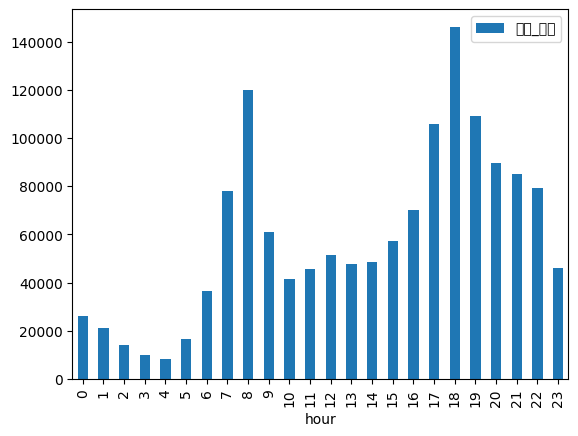

In [36]:
여름.query(" 요일 == '금'").groupby('hour')[['전체_건수']].sum().plot(kind='bar')

<Axes: xlabel='hour'>

/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/encore/miniconda3/lib/pyt

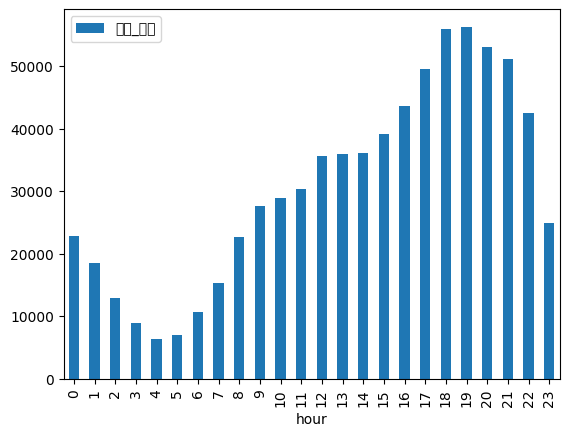

In [37]:
여름.query(" 요일 == '일'").groupby('hour')[['전체_건수']].sum().plot(kind='bar')

In [40]:
pd.options.display.float_format = '{:.2f}'.format

In [45]:
pd.DataFrame(여름.전체_이용_분.agg(['mean', 'median', 'std', 'count'])).T

,mean,median,std,count
전체_이용_분,21.18,11.00,28.66,6912729.00


In [46]:
pd.DataFrame(겨울.전체_이용_분.agg(['mean', 'median', 'std', 'count'])).T

,mean,median,std,count
전체_이용_분,17.74,9.00,24.74,3954623.00


In [47]:
pd.concat([pd.DataFrame(여름.전체_이용_분.agg(['mean', 'median', 'std', 'count'])).T,
          pd.DataFrame(겨울.전체_이용_분.agg(['mean', 'median', 'std', 'count'])).T])

,mean,median,std,count
전체_이용_분,21.18,11.00,28.66,6912729.00
전체_이용_분,17.74,9.00,24.74,3954623.00


In [48]:
여름['대여소쌍'] = 여름['시작_대여소_ID'] + "_" +  여름['종료_대여소_ID']

In [50]:
여름['대여소쌍'].value_counts()

대여소쌍
ST-2905_ST-2905    2393
ST-2007_ST-3163    2251
ST-3163_ST-2007    1959
ST-2050_ST-2871    1942
ST-2871_ST-2050    1837
                   ... 
ST-36_ST-2176         1
ST-31_ST-2050         1
ST-2449_ST-336        1
ST-1492_ST-144        1
ST-1212_ST-1423       1
Name: count, Length: 367949, dtype: int64

In [54]:
여름[여름['대여소쌍'] == "ST-2905_ST-2905"]

,기준_날짜,집계_기준,기준_시간대,시작_대여소_ID,시작_대여소명,종료_대여소_ID,종료_대여소명,전체_건수,전체_이용_분,전체_이용_거리,시간대,요일,hour,대여소쌍
217637,20240801,출발시간,1835,ST-2905,망원1동_005_1,ST-2905,망원1동_005_1,1,32.00,4760.00,2024-08-01 18:35:00,목,18,ST-2905_ST-2905
223891,20240801,출발시간,1455,ST-2905,망원1동_005_1,ST-2905,망원1동_005_1,1,68.00,21447.00,2024-08-01 14:55:00,목,14,ST-2905_ST-2905
225477,20240801,출발시간,2030,ST-2905,망원1동_005_1,ST-2905,망원1동_005_1,1,46.00,8172.00,2024-08-01 20:30:00,목,20,ST-2905_ST-2905
231733,20240801,출발시간,1440,ST-2905,망원1동_005_1,ST-2905,망원1동_005_1,1,19.00,2947.00,2024-08-01 14:40:00,목,14,ST-2905_ST-2905
232448,20240801,출발시간,2210,ST-2905,망원1동_005_1,ST-2905,망원1동_005_1,3,30.00,1354.00,2024-08-01 22:10:00,목,22,ST-2905_ST-2905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11046971,20240826,출발시간,2210,ST-2905,망원1동_005_1,ST-2905,망원1동_005_1,1,53.00,6519.00,2024-08-26 22:10:00,월,22,ST-2905_ST-2905
11050992,20240826,출발시간,2225,ST-2905,망원1동_005_1,ST-2905,망원1동_005_1,2,39.00,6493.00,2024-08-26 22:25:00,월,22,ST-2905_ST-2905
11053780,20240826,도착시간,2235,ST-2905,망원1동_005_1,ST-2905,망원1동_005_1,1,NaN,NaN,2024-08-26 22:35:00,월,22,ST-2905_ST-2905
11057048,20240826,출발시간,2255,ST-2905,망원1동_005_1,ST-2905,망원1동_005_1,1,9.00,641.00,2024-08-26 22:55:00,월,22,ST-2905_ST-2905
